<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/MNIST_AutoEncoders_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np

In [7]:
(X_train, _), (X_test, _) = mnist.load_data()

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [10]:
X_train.shape

(60000, 784)

In [11]:
encoding_dim = 32

In [12]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [13]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


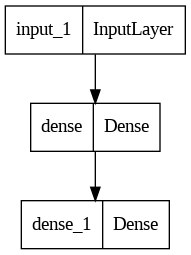

In [14]:
keras.utils.plot_model(autoencoder)

In [16]:
encoder = keras.Model(input_img, encoded)

In [21]:
type(autoencoder.layers[-1])

keras.src.layers.core.dense.Dense

In [22]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [23]:
autoencoder.compile(
    optimizer='adam',
    loss='binary_crossentropy'
)

In [24]:
autoencoder.fit(
    X_train, X_train,
    epochs=20,
    batch_size=64,
    shuffle=True,
    validation_data=(X_test, X_test)
)

Epoch 1/20
938/938 [==============================] - 7s 6ms/step - loss: 0.1904 - val_loss: 0.1323
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1196 - val_loss: 0.1080
Epoch 3/20
938/938 [==============================] - 6s 6ms/step - loss: 0.1040 - val_loss: 0.0988
Epoch 4/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0980 - val_loss: 0.0951
Epoch 5/20
938/938 [==============================] - 6s 6ms/step - loss: 0.0959 - val_loss: 0.0941
Epoch 6/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0950 - val_loss: 0.0933
Epoch 7/20
938/938 [==============================] - 6s 6ms/step - loss: 0.0946 - val_loss: 0.0931
Epoch 8/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0943 - val_loss: 0.0928
Epoch 9/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0941 - val_loss: 0.0927
Epoch 10/20
938/938 [==============================] - 6s 6ms/step - loss: 0.0939 - val_loss: 0.0925

In [25]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


In [26]:
decoded_imgs[0].shape

(784,)

In [27]:
import matplotlib.pyplot as plt

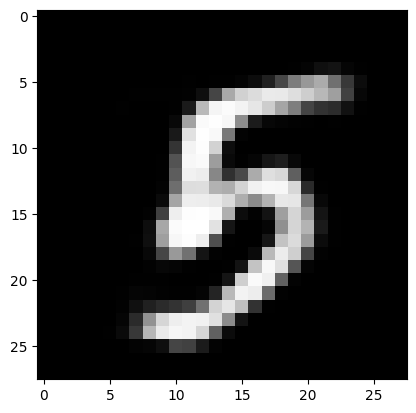

In [35]:
n = 1
index = np.random.choice(X_test.shape[0], n, replace=False)

plt.imshow(decoded_imgs[index].reshape(28, 28, 1), cmap='gray');

In [ ]:
# THIS IS ART!